<a href="https://colab.research.google.com/github/fontanads/bootcamp_dsa_2021/blob/main/Bruno_Fontana_da_Silva_M03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Três fatores que podem estar associados a maiores índices de obesidade em crianças e adolescentes </h1>

Notebook elaborado por [__Bruno Fontana da Silva__](https://github.com/fontanads).  (fontanads@gmail.com). <br>
**Versão**: 10 de Janeiro de 2021

Neste trabalho, analisei a base de dados [Pesquisa Nacional de Saúde do Escolar - PeNSE](), referente à coleta do ano de 2015.

 Em particular, estou trabalhando com a **Amostra 2**, cuja abrangência geográfica envolve "*Brasil e Grandes Regiões*" (veja mais notas técnicas sobre a diferença entre as amostras [neste link](https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar.?=&t=notas-tecnicas)). 

O público-alvo da Amostra 2 dessa pesquisa são estudantes de turmas selecionadas em escolas públicas e privadas com faixa etária de 13 a 17 anos (5º série do ensino fundamental até 3º ano do ensino médio).


**Objetivo Principal**: encontrar alguns fatores que podem estar associados a maiores índices de massa corporal das crianças e adolescentes através da análise das respostas da pesquisa.

**Contexto da análise exploratória dos dados**: existem muitas perguntas no questionário, e após descartar muitas hipóteses (e mudar de tema!), fiz um resumo das informações que julguei mais intrigantes e que conseguem mostrar uma distinção clara nas distribuições de IMC de acordo com algumas respostas qualitativas. O IMC é um dos poucos valores quantitativos desse dataset (obtido pela relação entre o PESO e a ALTURA), permitindo que sejam realizados alguns testes estatísticos interessantes além das estatísticas descritivas e condicionais. Ainda, optei pela amostra 2 porque apesar da amostra 1 ter mais informação, não encontrei nela a anotação de altura. Além disso, a variância de idade na amostra 1 é muito baixa, pois ela concentra apenas dados de estudantes da 9ª série.

**Principais Conclusões**: os principais resultados dessa análise são apontar <font color='blue'>**três fatores que distinguem a distribuição de dados de IMC dos estudantes**</font>, e esses fatores são
- o hábito de tomar o <font color=red>café da manhã</font>,
- o <font color=red>turno</font> de estudo,
- a realização das <font color=red>refeições junto com os pais</font>.





<a name="toc2"></a>
# Sumário
- [Resumo](#abstract)
- [Bibliotecas e Funções Auxiliares](#imports)
- [Carregando os Dados](#load_data)
- [Visão geral do IMC](#imc_overview)
- [Buscando por uma correlação entre o IMC com o tempo de exercicios e com a frequência de consumo de certos alimentos](#imc_ex_alimentos)
- [Usando a eCDF para observar diferença de comportamento entre as distribuições de IMC](#eCDF)
 - [Café da Manhã](#breakfast)
 - [Turno de Estudo](#turno)
 - [Refeições junto com os pais](#parents_meals)

<a name="abstract"></a>
## Resumo
[(voltar para o sumário)](#toc2)

### Fator 1: o hábito do desjejum (*aka* café da manhã)

Ao analisar a distribuição de IMCs a partir das respostas da questão:
<font color=red>

> VB02019A: Você costuma tomar o café da manhã?
</font>

percebeu-se a presença de **3 grupos**: 
- os que sempre tomam café da manhã (opção 1)
- os que nunca tomam café da manhã (opção 6)
- os que tomam café da manhã às vezes (agregando respostas das outras opções).

Fazendo uma análise de distribuição empírica (e-CDF) do IMC para aproximar a *Função Distribuição Acumulada* (CDF) original através dos dados, é notável a diferença entre os três grupos (Figura abaixo). 

A eCDF, assim como a CDF, varia de 0 a 1 conforme a proporção de amostras dentro da faixa da variável no eixo horizontal. Ou seja, no caso do IMC, quanto mais cedo (a partir de $\text{IMC}=18{,}5$) e mais abrupta for a subida dessa curva, melhor.

Chama-se a atenção para o percentual acumulado de cada grupo no ponto $\text{IMC}\approx 24{,}99$:
- apenas $12\%$ dos estudantes que tem o hábito de tomar o café da manhã estão com o $\text{IMC}\geq 25 $ (categorias acima do peso e obesidade),
- $18\%$ dos estudantes que tem o hábito de tomar o café da manhã apenas às vezes têm $\text{IMC}\geq 25 $,
- $20\%$ dos estudantes que NÃO tem o hábito de tomar o café da manhã têm $\text{IMC}\geq 25 $.

Veja que para interpretar essa curva, fazemos a análise complementar dos valores indicados na linha vertical pontilhada do gráfico, os quais mostram o percentual de acumulado de amostras daquele grupo até aquele valor de IMC.

**Conclusão preliminar 1:** <font color=red>o hábito de tomar o café da manhã influencia positivamente no controle do IMC, visto que os grupos que não têm esse hábito possuem maior pecentual de estudantes acima da faixa 'normal' do índice</font>.


<img src="https://github.com/fontanads/bootcamp_dsa_2021/raw/main/pics/cafe_da_manha.png" alt="eCDF do IMC para cada hábito de café da manhã:" width="1200px"/> 

### Fator 2: o turno de estudo

Ao analisar a distribuição de IMCs a partir das respostas da questão:
<font color=red>

> VB01022: Em que turno você estuda?
</font>

também percebeu-se a presença de **3 grupos**, pois foi possível inferir que as opções de turno "Manhã", "Intermediário" e "Integral" parecem apresentar dados de IMC da mesma distribuição. 

Novamente, através da e-CDF do IMC para esses grupos, chama-se a atenção para o percentual acumulado de cada grupo no ponto $\text{IMC}\approx 24{,}99$:
- apenas $12\%$ dos estudantes que estudam no turno da tarde estão com o $\text{IMC}\geq 25 $ (categorias acima do peso e obesidade),
- $14\%$ dos estudantes que estudam nos turnos "Manhã", "Intermediário" ou "Integral" (denominados "Manhã_agg") têm $\text{IMC}\geq 25 $,
- $23\%$ dos estudantes estudam no turno da noite têm $\text{IMC}\geq 25 $.

**Conclusão preliminar 2:** nessa caso, é mais difícil explicar como a situação de turno de estudo está afetando no IMC, mas podemos levantar algumas hipóteses:
- <font color=red> pode haver uma relação entre estudar no turno da tarde e conseguir tomar o café da manhã com maior regularidade </font>,
- é possível que escolas públicas ofereçam opções de alimentação acessíveis e saudáveis para alunos do turno da manhã e tarde, enquanto o mesmo pode não acontecer nos turnos da noite (*necessário mais investigação com o dataset*)
- estudantes do turno da noite possivelmente estão nessa condição em razão de outros aspectos da sua vida (trabalho, localização da sua residência, idade mais avançada, etc.) e que, combinados, podem explicar a maior fatia dos IMCs acima do peso ideal.


<img src="https://github.com/fontanads/bootcamp_dsa_2021/raw/main/pics/turno_de_estudo.png" alt="eCDF do IMC para os diferentes turnos de estudo:" width="1200px"/> 

### Fator 3: presença dos pais durante as refeições

Ao analisar a distribuição de IMCs a partir das respostas da questão:
<font color=red>

> VB02017A: Você costuma almoçar ou jantar com sua mãe, pai ou responsável? 
</font>

percebeu-se a presença de apenas **2 grupos**, pois foi só foi possível inferir que a amostra de IMC dos estudantes que responderam a opção 1 ('Sim, todos os dias') não pertence à mesma distribuição dos estudantes que marcaram as demais opções.


Novamente, através da e-CDF do IMC para esses grupos, chama-se a atenção para o percentual acumulado de cada grupo no ponto $\text{IMC}\approx 24{,}99$:
- apenas $13\%$ dos estudantes que fazem todas as refeições com seus pais possuem $\text{IMC}\geq 25 $ (categorias acima do peso e obesidade),
- $16\%$ dos estudantes NÃO fazem todas as refeições com seus pais têm $\text{IMC}\geq 25 $.

**Conclusão preliminar 3:** também não encontrei uma explicação direta para essa situação, mas levanto algumas hipóteses:
- <font color=red> a presença dos pais pode sugerir uma regularidade nos cuidados com a alimentação, evitando inclusive que o estudante pule refeições ou abuse de alimentos que não são saudáveis </font>,
- as condições de trabalho ou renda dos pais pode impedir que esse encontro nas refeições seja possível, e a partir daí outros fatores se combinam para explicar o maior percentual.


<img src="https://github.com/fontanads/bootcamp_dsa_2021/raw/main/pics/refeicao_pais.png" alt="eCDF do IMC comparando quem sempre faz refeições com os pais em relação aos outros:" width="1200px"/> 

*Observação*: é possível chegar nas mesmas conclusões usando uma análise sem gráficos; minha sugestão seria usar o ``crosstab`` e agregações de contagem, média e proporção normalizada. Entretanto, para mim, é mais difícil perceber as tendências dos números nas tabelas, portanto sempre prefiro usar os gráficos.

<a name="imports"></a>
## Bibliotecas e Funções Auxiliares
[(voltar para o sumário)](#toc2)

**Resumo**: nada importante nesta seção, apenas carregando bibliotecas e agrupando funções auxiliares.

In [ ]:
import requests, io
from zipfile import ZipFile
from io import StringIO
from itertools import product 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

In [ ]:
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import ztest
from scipy.stats import normaltest
from scipy.stats import ranksums

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import string
import re

! pip install nltk
import nltk 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def load_file(caminho, verbose=True):
  print(caminho)
  arquivo = ZipFile(caminho)
  if verbose:
    for i,f in enumerate(arquivo.namelist()):
      print(f' ({i}) {f}')
  return arquivo

In [ ]:
def get_dict_of_form(arquivo, sheet_name):    
    dict_PENSE_df = pd.read_excel(arquivo, sheet_name=sheet_name,) # 'AMOSTRA1_ESCOLA' ou 'AMOSTRA1_ALUNO'
    f = lambda x: str.isdigit(x) if type(x)==str else True
    str_idxs = dict_PENSE_df [~dict_PENSE_df['VARIÁVEL'].apply(f) ].index
    N_idxs = len(str_idxs)
    dict_PENSE = {}
    for id_var in range(N_idxs):
        idx_atual   = str_idxs[id_var]
        if id_var+1 < N_idxs:
            idx_proximo = str_idxs[id_var+1]
        elif idx_atual < len(dict_PENSE_df)-1:
            idx_proximo = len(dict_PENSE_df) - idx_atual + 1
        else:
            idx_proximo = idx_atual + 1 
        cod      = dict_PENSE_df.iloc[idx_atual,0]
        cod_str  = dict_PENSE_df.iloc[idx_atual,1]
        if idx_proximo == idx_atual + 1:
            val = (cod_str, None)
        else:
            opt_dict = {}
            for opt in range(idx_atual+1, idx_proximo):
                opt_int, opt_str = (int(dict_PENSE_df.iloc[opt,0]), dict_PENSE_df.iloc[opt,1])
                opt_dict[opt_int] = opt_str
            val = (cod_str, opt_dict)
        dict_PENSE[cod] = val
    return dict_PENSE

In [ ]:
def lista_questoes_categoria(df, cat='01', sheet='ALUNO'):
    if sheet == 'ALUNO':
        prefix = 'VB'
    else:
        prefix = 'VE'
    lista = [x for x in df.columns.tolist() if x[:(2+len(cat))] == prefix+cat]
    return lista

In [ ]:
def plot_ecdfs_of_imc(q, vline = (24.9, 0, 1), hline = (0.8, 18, 29)):

  df_q = df[df[q]!=99]            # desprezando valor não informado
  Ncats = len(df_q[q].unique())     # categorias únicas
  imprime_codigo_questao([q])

  plt.figure(figsize=(18,7))
  sns.ecdfplot(data=df_q, x='IMC', hue=q, 
              palette=sns.color_palette("hls", Ncats))
  plt.title(dict_PENSE_ALUNO_2[q][0])
  plt.xlabel('IMC')
  plt.ylabel('Proporção')
  plt.hlines(y=hline[0],xmin=hline[1],xmax=hline[2])
  plt.vlines(x=vline[0],ymin=vline[1],ymax=vline[2])
  plt.xlim([18,29])

In [ ]:
def boxplots_q_categorica(q):
  df_q = df.query(f'{q} < 99')
  titulo = dict_PENSE_ALUNO_2[q][0]
  plt.figure(figsize=(9,9))
  sns.boxplot(data=df_q, y='IMC', x=q)
  plt.title(titulo)
  plt.ylim([10,35])
  # plt.xlim([0,5])

In [ ]:
def replace_tuplas(s, lista_tuplas):
  for old_str, new_str in lista_tuplas:
    s = s.replace(old_str,new_str)
  return s

In [ ]:
#------------------------------------------------------------------------------------------------
# MÉTODO PARA CONFIGURAR AS FONTES DE UM GRÁFICO COM BASE NOS VALORES PADRONIZADOS 
#------------------------------------------------------------------------------------------------
# Valores padronizados para tamanho de fontes em gráficos
SMALL_SIZE = 16
MEDIUM_SIZE = 24
BIGGER_SIZE = 30
def set_fontsizes_in_plot():
    plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
set_fontsizes_in_plot()

<a name="load_data"></a>
## Carregando os Dados
[(voltar para o sumário)](#toc2)


**Resumo**: aqui vou baixar os dados do GitHub com ``wget`` do Linux, extrair o dicionário das variáveis com ``unzip`` e carregar os dados em um *DataFrame* usando o ``ZipFile``, conforme realizado no curso. Um passo além é a criação de um dicionário contendo *códigos:pergunta* e para cada pergunta um outro dicionário *código:resposta* (não foi feito do jeito mais eficiente, mas ficou genérico para usar tanto na amostra 1 quanto na 2). 

In [ ]:
!wget -O 'PeNSE_2015_AMOSTRA2.zip' 'https://github.com/fontanads/bootcamp_dsa_2021/blob/main/data/PeNSE_2015_AMOSTRA2.zip?raw=true'

--2021-01-10 23:42:58--  https://github.com/fontanads/bootcamp_dsa_2021/blob/main/data/PeNSE_2015_AMOSTRA2.zip?raw=true
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/fontanads/bootcamp_dsa_2021/raw/main/data/PeNSE_2015_AMOSTRA2.zip [following]
--2021-01-10 23:42:58--  https://github.com/fontanads/bootcamp_dsa_2021/raw/main/data/PeNSE_2015_AMOSTRA2.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fontanads/bootcamp_dsa_2021/main/data/PeNSE_2015_AMOSTRA2.zip [following]
--2021-01-10 23:42:58--  https://raw.githubusercontent.com/fontanads/bootcamp_dsa_2021/main/data/PeNSE_2015_AMOSTRA2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.co

In [ ]:
!unzip -p '/content/PeNSE_2015_AMOSTRA2.zip' 'Dicionario_PENSE_Microdados_AMOSTRA2.xls' > 'Dicionario_PENSE_Microdados_AMOSTRA2.xls'

In [ ]:
!pwd
print('[...]')
!ls -lh

/content
[...]
total 38M
-rw-r--r-- 1 root root  64K Jan 10 23:42 cafe_da_manha.png
-rw-r--r-- 1 root root 142K Jan 10 23:42 Dicionario_PENSE_Microdados_AMOSTRA2.xls
-rw-r--r-- 1 root root    0 Jan 10 17:27 file.txt
-rw-r--r-- 1 root root  38M Jan 10 23:42 PeNSE_2015_AMOSTRA2.zip
-rw-r--r-- 1 root root  57K Jan 10 23:42 refeicao_pais.png
drwxr-xr-x 1 root root 4.0K Jan  6 18:10 sample_data
-rw-r--r-- 1 root root  60K Jan 10 23:42 turno_de_estudo.png


In [ ]:
caminho = '/content/PeNSE_2015_AMOSTRA2.zip'
arquivo = load_file(caminho)
file_ALUNOESCOLA = arquivo.namelist()[2]
df = pd.read_csv(arquivo.open(file_ALUNOESCOLA), sep=';', thousands='.', decimal=',')
df.head()

/content/PeNSE_2015_AMOSTRA2.zip
 (0) arquivos csv/
 (1) arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV
 (2) arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV
 (3) arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV
 (4) arquivos sas/
 (5) arquivos sas/pense_amostra2_aluno.sas7bdat
 (6) arquivos sas/pense_amostra2_alunoescola.sas7bdat
 (7) arquivos sas/pense_amostra2_escola.sas7bdat
 (8) arquivos xlsx/
 (9) arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx
 (10) arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx
 (11) arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx
 (12) Dicionario_PENSE_Microdados_AMOSTRA2.xls


,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VE01P14A04,VE01P14A05,VE01P14A06,VE01P14A07,VE01P14A08,VE01P14A09,VE01P14A10,VE01P14A11,VE01P49,VE01P50,VE01P51,VE01P52,VE01P53,VE01P54,VE01P55,VE01P56,VE01P57,VE01P58,VE01P25,VE01P59,VE01P60,VE01P61,VE01P62,VE01P63,VE01P64,VE01P65,VE01P66,VE01P67,VE01P26,VE01P27,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,5,1,296


In [ ]:
arquivo_dicionario = '/content/Dicionario_PENSE_Microdados_AMOSTRA2.xls'
dict_PENSE_ALUNO_2  = get_dict_of_form(arquivo=arquivo_dicionario, sheet_name='AMOSTRA2_ALUNO')
dict_PENSE_ESCOLA_2 = get_dict_of_form(arquivo=arquivo_dicionario, sheet_name='AMOSTRA2_ESCOLA')
# forma de usar
# print(dict_PENSE_ALUNO_2['ANOPESQ'])
# print(dict_PENSE_ALUNO_2['VB01022'])
# print(dict_PENSE_ESCOLA_2['ANOPESQ'][0], dict_PENSE_ESCOLA_2['ANOPESQ'][1])
# print(dict_PENSE_ESCOLA_2['VE01P33'][0])
# print(dict_PENSE_ESCOLA_2['VE01P33'][1])
# print('5:', dict_PENSE_ESCOLA_2['VE01P33'][1][5])

In [ ]:
def imprime_codigo_questao(lista, dicionario_aluno=dict_PENSE_ALUNO_2, dicionario_escola=dict_PENSE_ESCOLA_2):
  for q in lista:
    if q in dicionario_aluno:
      print(f'{q}: {dicionario_aluno[q][0]}')
    else:
      print(f'{q}: {dicionario_escola[q][0]}')

<a name="imc_overview"></a>
## Visão geral do IMC
[(voltar para o sumário)](#toc2)

**Resumo**: apenas a definição e cálculo do IMC.

O índice de massa corporal (IMC) é um fator calculado através de uma relação entre a massa corporal total (em kg) e a altura da pessoa (em m). Com essas unidades, o cálculo realizado é:

> $\text{IMC} = \dfrac{\text{Peso (kg)}}{\text{Altura}^2\text{ (m$^2$)}}$

Abaixo, podemos visualizar como seria um mapa de calor de altura e peso para diferentes faixas consolidades na classificação da saúde do corpo em relação aos valores de IMC. Utilizei o ``numpy`` para gerar todas as combinações de peso e altura.

Entretanto, ressalta-se que pode haver faixas diferentes de acordo com a idade e com o sexo da pessoa, portanto essa escala que estamos levando em consideração é uma simplificação para uma regra geral.

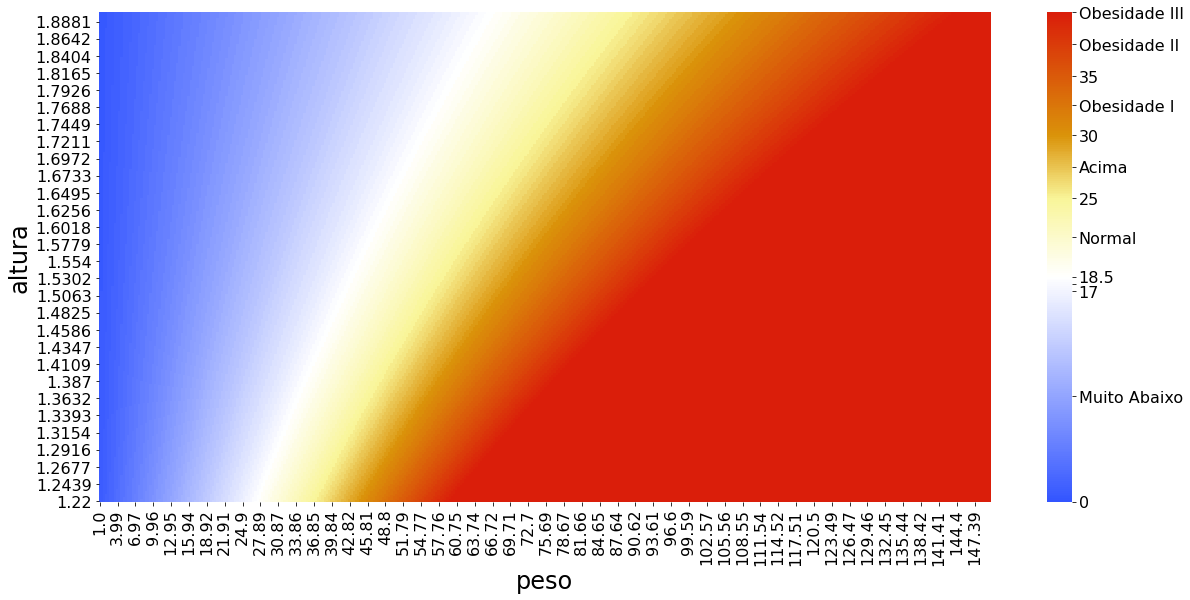

In [ ]:
N=400
alturas = np.linspace(1.22, 1.9 ,N).reshape(-1,1)
pesos   = np.linspace(1, 150, N).reshape(-1,1)

imc_chart = pd.DataFrame((alturas**-2)@pesos.T)
imc_chart = imc_chart.rename(columns= dict( enumerate(pesos.round(2).reshape(-1)) ), index=dict(enumerate(alturas.round(4).reshape(-1)))).rename_axis()
imc_chart = imc_chart.rename_axis('peso',axis=1).rename_axis('altura',axis=0)

offset = 0
abs_range = 39.99-0
boundaries     = ((np.array([0,17, 18.49, 24.99, 29.99, 34.99, 39.99]) - offset)/(abs_range)).round(2).tolist() 
boundaries_avg = [np.mean(boundaries[i:i+2]) for i in range(len(boundaries)-1)]

# hex_colors = sns.color_palette("colorblind", as_cmap=False, n_colors=len(boundaries)).as_hex()
# hex_colors = [hex_colors[i] for i in range(0, len(hex_colors))]
# colors     = list(zip(boundaries, hex_colors))
colors = [(0.0, '#3355ff'),
 (0.46, '#ffffff'),
 (0.62, '#f9f599'),
 (0.75, '#DA930A'),
 (1.0, '#DA1E0A')]
custom_color_map = LinearSegmentedColormap.from_list(name='imc_colors',colors=colors)

plt.figure(figsize=(20,9))
ax = sns.heatmap(data=((imc_chart - offset)/abs_range).round(2), cmap=custom_color_map, vmin=0, vmax=1)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks(boundaries+ boundaries_avg)
colorbar.set_ticklabels(['0',  "17", '18.5', '25','30', '35', 'Obesidade III'] 
                        + ['Muito Abaixo', '', 'Normal', 'Acima', 'Obesidade I', 'Obesidade II'])
plt.gca().invert_yaxis()
plt.show()

A partir dos dados, podemos fazer um gráfico semelhante e ver onde os estudantes da Amostra 2 da PENSE 2015 estão nesse mapa.  

Para fazer isso, vamos usar a função ``pivot_table`` para gerar uma tabela cujos índices são as alturas e as colunas são os pesos. 

Porém, será necessário aplicar a função ``reindex`` para que a função ``heatmap`` do ``seaborn`` consiga espaçar os valores linearmenteem ambos os eixos.

In [ ]:
imprime_codigo_questao(['VB17003','VB17004'])
df['Altura (m)'] = df['VB17004']/100
df.rename(columns={'VB17003':'Peso (kg)'}, inplace=True)

VB17003: Peso do estudante, incluindo os imputados, com uma casa decimal 
VB17004: Altura do estudante, incluindo os imputados, com uma casa decimal


In [ ]:
IMC = df['Peso (kg)']/(df['Altura (m)']**2)
df['IMC'] = IMC
df['Altura (m)'] = df['Altura (m)'].round(4)

In [ ]:
vars_imc = ['Peso (kg)','Altura (m)','IMC']
df_imc = df[vars_imc].dropna().pivot_table(index='Altura (m)', columns='Peso (kg)', values='IMC')
df_imc

Peso (kg),0.8,20.9,22.1,22.9,23.6,23.8,24.0,24.1,24.3,24.4,24.5,24.9,25.0,25.1,25.3,25.4,25.5,25.6,25.7,25.9,26.0,26.1,26.3,26.4,26.5,26.6,26.8,26.9,27.0,27.1,27.2,27.3,27.4,27.5,27.7,27.8,27.9,28.0,28.1,28.2,...,116.8,116.9,118.2,118.8,119.8,120.1,120.9,121.6,122.0,122.6,123.7,125.2,125.8,126.0,126.2,126.4,126.5,128.0,128.2,129.3,129.8,132.4,133.1,133.4,134.5,135.0,135.3,135.7,138.8,141.1,141.6,143.3,145.3,147.7,153.0,155.6,156.5,158.2,169.1,171.5
Altura (m),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.401682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.998992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.967773,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.504782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.290,NaN,NaN,13.280452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_heatmap_from_data = (df_imc.round(2)- offset)/abs_range
new_idx  = sorted(df_heatmap_from_data.index.to_list() + pd.Index(alturas.reshape(-1)).to_list())
new_idx = [round(x,2) for x in new_idx]
df_heatmap_from_data = df_heatmap_from_data.reindex(new_idx)
df_heatmap_from_data = df_heatmap_from_data.T
new_idx  = sorted(df_heatmap_from_data.index.to_list() + pd.Index(pesos.reshape(-1)).to_list())
new_idx = [round(x,2) for x in new_idx]
df_heatmap_from_data = df_heatmap_from_data.reindex(new_idx)
df_heatmap_from_data = df_heatmap_from_data.T
df_heatmap_from_data

Peso (kg),0.80,1.00,1.37,1.75,2.12,2.49,2.87,3.24,3.61,3.99,4.36,4.73,5.11,5.48,5.85,6.23,6.60,6.97,7.35,7.72,8.10,8.47,8.84,9.22,9.59,9.96,10.34,10.71,11.08,11.46,11.83,12.20,12.58,12.95,13.32,13.70,14.07,14.44,14.82,15.19,...,139.54,139.92,140.29,140.66,141.04,141.10,141.41,141.60,141.78,142.16,142.53,142.90,143.28,143.30,143.65,144.03,144.40,144.77,145.15,145.30,145.52,145.89,146.27,146.64,147.01,147.39,147.70,147.76,148.13,148.51,148.88,149.25,149.63,150.00,153.00,155.60,156.50,158.20,169.10,171.50
Altura (m),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


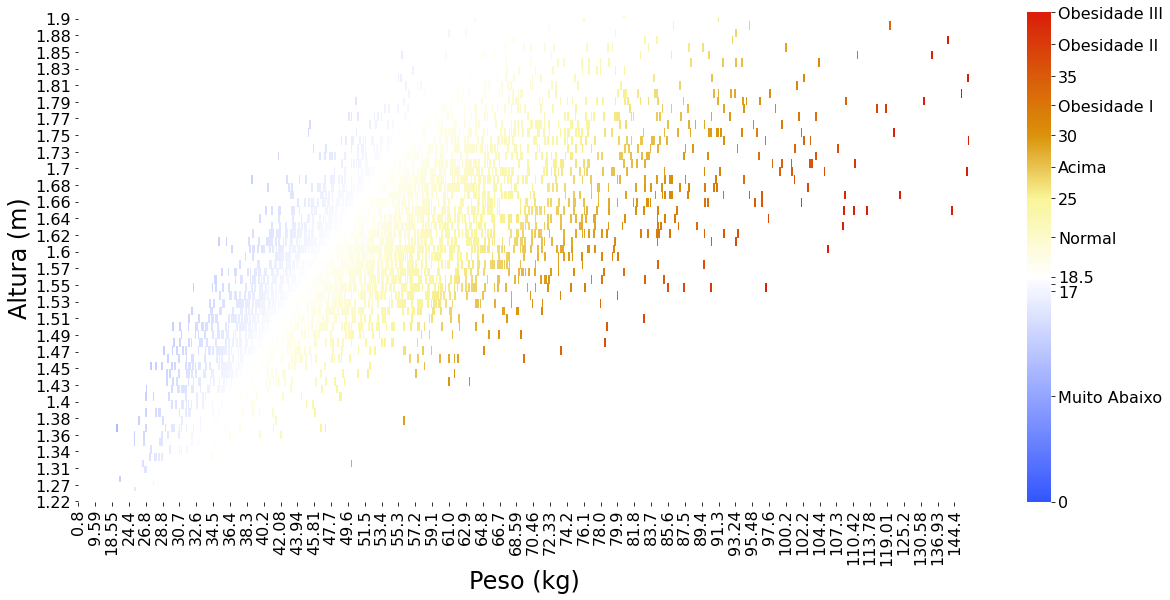

In [ ]:
plt.figure(figsize=(20,9))

ax = sns.heatmap(data=df_heatmap_from_data, cmap=custom_color_map,vmin=0,vmax=1)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks(boundaries+ boundaries_avg)
colorbar.set_ticklabels(['0',  "17", '18.5', '25','30', '35', 'Obesidade III'] + ['Muito Abaixo', '', 'Normal', 'Acima', 'Obesidade I', 'Obesidade II'])
plt.gca().invert_yaxis()


<a name="imc_ex_alimentos"></a>
## Buscando por uma correlação entre o IMC com o tempo de exercicios e com a frequência de consumo de certos alimentos
[(voltar para o sumário)](#toc2)

**Resumo**: aqui eu busco encontrar alguma correlação do IMC com os tipos de alimentos consumidos pelos estudantes e com a prática de exercícios e atividades físicas. 

Curiosamente, <font color='red'>parece haver uma correlação muito fraca entre IMC x alimentação e IMC x tempo/frequência de atividades físicas </font>. Como isso é muito contra-intuitivo, penso em duas possibilidades:
- os estudantes não foram muito sinceros nas suas respostas
- a pesquisa não capturou as variáveis relevantes desses dois temas
- minha análise possui algum erro.

### Hábito de consumo de determinados alimentos

Na primeira parte, vou carregar as perguntas quantitativas sobre a alimentação dos estudantes. 

In [ ]:
# alimentacao = lista_questoes_categoria(df, cat='02')
alimentacao_quantitativa = ['VB02001','VB02002','VB02004A','VB02010','VB02011','VB02013','VB02022','VB02023','VB02025','VB02026','VB02027']
imprime_codigo_questao(alimentacao_quantitativa)

VB02001: NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu feijão?
VB02002: NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu salgados fritos? Exemplo: batata frita (sem contar a batata de pacote) ou salgados fritos como coxinha de galinha, quibe frito, pastel frito, acarajé etc.
VB02004A: NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu pelo menos um tipo de legume ou verdura? Exemplos: alface, abóbora, brócolis, cebola, cenoura, chuchu, couve, espinafre, pepino, tomate etc. Não inclua batata e aipim (mandioca/macaxeira).
VB02010: NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu guloseimas (doces, balas, chocolates, chicletes, bombons ou pirulitos)?
VB02011: NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu frutas frescas ou salada de frutas? 
VB02013: NOS ÚLTIMOS 7 DIAS, em quantos dias você tomou refrigerante?
VB02022: NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu alimentos industrializados/ultraprocessados salgados, como hambúrguer, presunto, mortadela, salame, linguiça, salsicha, macarrão ins

Aqui apenas um processamento básico e 'automático' de strings para rotular o gráfico dos coeficientes de correlação.

In [ ]:
stopwords = nltk.corpus.stopwords.words('portuguese')

lista_tuplas = [('NOS ÚLTIMOS 7 DIAS, em quantos dias você','7'), 
                ('NOS ÚLTIMOS 30 DIAS, quantas vezes por dia você','30'),
                ('normalmente comeu',''),
                ('pelo menos um tipo de ',''),
                ('comeu',''),
                ('tomou',''),('/',' ')]

alimento_label = dict()
for q in alimentacao_quantitativa:
    pergunta_str = dict_PENSE_ALUNO_2[q][0]
    pergunta_str = replace_tuplas(pergunta_str, lista_tuplas)
    pergunta_str = re.sub(r'[^\w\s]','',pergunta_str) # remove punctuation
    pergunta_tokens = word_tokenize(pergunta_str.lstrip())
    pergunta_tokens = [t for t in pergunta_tokens if t not in stopwords]
    
    val = ' '.join(pergunta_tokens[:3])
#     print(val)
    alimento_label[q] = val
alimento_label

{'VB02001': '7 feijão',
 'VB02002': '7 salgados fritos',
 'VB02004A': '7 legume verdura',
 'VB02010': '7 guloseimas doces',
 'VB02011': '7 frutas frescas',
 'VB02013': '7 refrigerante',
 'VB02022': '7 alimentos industrializados',
 'VB02023': '7 restaurantes fast',
 'VB02025': '30 frutas frescas',
 'VB02026': '30 legumes verduras',
 'VB02027': '30 refrigerante'}

In [ ]:
df_alimentacao_quantitativa = df[alimentacao_quantitativa].replace(dict(zip(range(1,9),range(0,8)))).replace({99:np.nan}).dropna()
print(df_alimentacao_quantitativa.describe())
df_alimentacao_quantitativa['IMC']  = df['IMC'].loc[df_alimentacao_quantitativa.index]
df_alimentacao_quantitativa['PESO'] = df['Peso (kg)'].loc[df_alimentacao_quantitativa.index]
cols = df_alimentacao_quantitativa.columns.tolist()
cols.remove('IMC')
cols.insert(0,'IMC')
df_alimentacao_quantitativa = df_alimentacao_quantitativa[cols]

            VB02001       VB02002  ...       VB02026       VB02027
count  16339.000000  16339.000000  ...  16339.000000  16339.000000
mean       4.472612      1.916274  ...      2.427505      2.462146
std        2.607706      2.070189  ...      1.799146      1.874462
min        0.000000      0.000000  ...      0.000000      0.000000
25%        2.000000      0.000000  ...      1.000000      1.000000
50%        5.000000      1.000000  ...      2.000000      2.000000
75%        7.000000      3.000000  ...      3.000000      4.000000
max        7.000000      7.000000  ...      6.000000      6.000000

[8 rows x 11 columns]


Finalmente, as correlações entre variáveis quantitativas relacionadas ao consumo de determinados alimentos e também com o IMC e peso.

Como se pode obserar na prieira coluna, as frequências semanais e mensais de consumo desses alimentos não mostra correlação significativa com o IMC.

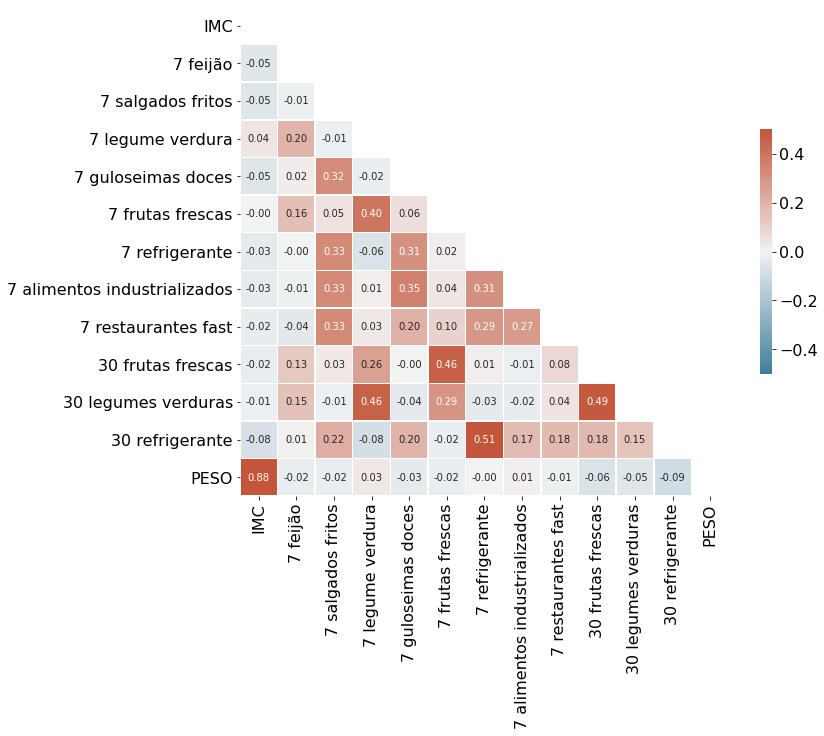

In [ ]:
corr = df_alimentacao_quantitativa.rename(columns=alimento_label).corr() # matriz de correlação
mask = np.triu(np.ones_like(corr, dtype=bool))                           # mascara triangular
cmap = sns.diverging_palette(230, 20, as_cmap=True)                      # custom diverging colormap

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, 
            vmin=-.5, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,  fmt='1.2f')

### Exercícios e Atividades Físicas

Na segunda parte, vou carregar as perguntas quantitativas sobre a prática de exercícios ou atividades físicas. 

In [ ]:
# exercicios = lista_questoes_categoria(df2, cat='03')
exercicios_quantitativa = ['VB03001A1','VB03001A2','VB03003A','VB03006A','VB03011A','TEMPODESLOC','TEMPOEDFIS','TEMPOEXTRA']
imprime_codigo_questao(exercicios_quantitativa)

VB03001A1: NOS ÚLTIMOS 7 DIAS, em quantos dias você FOI a pé ou de bicicleta para a escola?
VB03001A2: NOS ÚLTIMOS 7 DIAS, em quantos dias você VOLTOU a pé ou de bicicleta da escola?
VB03003A: NOS ÚLTIMOS 7 DIAS, quantos dias você teve aulas de educação física na escola?
VB03006A: NOS ÚLTIMOS 7 DIAS, sem contar as aulas de educação física da escola, em quantos dias você praticou alguma atividade física, como esportes, dança, ginástica, musculação, lutas ou outra atividade?
VB03011A: NOS ÚLTIMOS 7 DIAS, em quantos dias você fez atividade física por pelo menos 60 minutos (1 hora) por dia? (Some todo o tempo que você gastou em qualquer tipo de atividade física EM CADA DIA)
TEMPODESLOC: Refere-se ao tempo médio diário acumulado pelo escolar, com o deslocamento da casa para escola e da escola para casa feito a pé ou de bicicleta, nos últimos sete dias anteriores à pesquisa. Em minutos.
TEMPOEDFIS: Refere-se ao tempo médio acumulado, nos últimos sete dias anteriores à pesquisa, que o escolar

In [ ]:
df_exercicio_quantitativa = df[exercicios_quantitativa].replace(dict(zip(range(1,9),range(0,8)))).replace({99:np.nan}).dropna()
df_exercicio_quantitativa['VB03010A'] = df.loc[df_exercicio_quantitativa.index]['VB03010A'].replace({99:np.nan}).dropna()
df_exercicio_quantitativa['VB03009A'] = df.loc[df_exercicio_quantitativa.index]['VB03009A'].replace(dict(zip(range(1,11),range(0,10)))).replace({99:np.nan}).dropna()
print(df_exercicio_quantitativa.describe())
df_exercicio_quantitativa['IMC']  = df['IMC'].loc[df_exercicio_quantitativa.index]
df_exercicio_quantitativa['PESO'] = df['Peso (kg)'].loc[df_exercicio_quantitativa.index]
cols = df_exercicio_quantitativa.columns.tolist()
cols.remove('IMC')
cols.insert(0,'IMC')
df_exercicio_quantitativa = df_exercicio_quantitativa[cols]

          VB03001A1     VB03001A2  ...      VB03010A      VB03009A
count  16333.000000  16333.000000  ...  16297.000000  16316.000000
mean       2.585441      2.575461  ...      4.041603      3.371660
std        2.727950      2.669622  ...      2.679581      2.681754
min        0.000000      0.000000  ...      1.000000      0.000000
25%        0.000000      0.000000  ...      2.000000      1.000000
50%        1.000000      1.000000  ...      3.000000      3.000000
75%        5.000000      5.000000  ...      6.000000      5.000000
max        7.000000      7.000000  ...      9.000000      9.000000

[8 rows x 10 columns]


Mais um processamento básico e 'automático' de strings para rotular o gráfico dos coeficientes de correlação (não deu tempo de automatizar).

In [ ]:
lista_tuplas = [('NOS ÚLTIMOS 7 DIAS, em quantos dias você',''),
                ('NOS ÚLTIMOS 7 DIAS, quantos dias você teve',''),
                ('NOS ÚLTIMOS 7 DIAS, sem contar as aulas de educação física da escola, em quantos dias você',''),
                ('pelo menos um tipo de ',''),
                ('Em um dia de semana comum, quanto tempo você ',''),
                ('Em um dia de semana comum, quantas horas por dia você ','')]

exercicio_label = dict()
for q in exercicios_quantitativa + ['VB03010A','VB03009A']:
    if q not in ['TEMPODESLOC','TEMPOEDFIS','TEMPOEXTRA']:
        pergunta_str = dict_PENSE_ALUNO_2[q][0]
        pergunta_str = replace_tuplas(pergunta_str, lista_tuplas)
        pergunta_str = re.sub(r'[^\w\s]','',pergunta_str) # remove punctuation
        pergunta_tokens = word_tokenize(pergunta_str.lstrip())
        pergunta_tokens = [t for t in pergunta_tokens if t not in stopwords]

        val = ' '.join(pergunta_tokens[:3])
    #     print(val)
        exercicio_label[q] = val
exercicio_label

{'VB03001A1': 'FOI pé bicicleta',
 'VB03001A2': 'VOLTOU pé bicicleta',
 'VB03003A': 'aulas educação física',
 'VB03006A': 'praticou alguma atividade',
 'VB03009A': 'assiste TV contar',
 'VB03010A': 'fica sentadoa assistindo',
 'VB03011A': 'fez atividade física'}

Finalmente, as correlações entre variáveis quantitativas relacionadas ao consumo de determinados alimentos e também com o IMC e peso.

Como se pode obserar na prieira coluna, também não há indício de correlação significativa dos hábitos de prática e atividades físicas com o IMC.

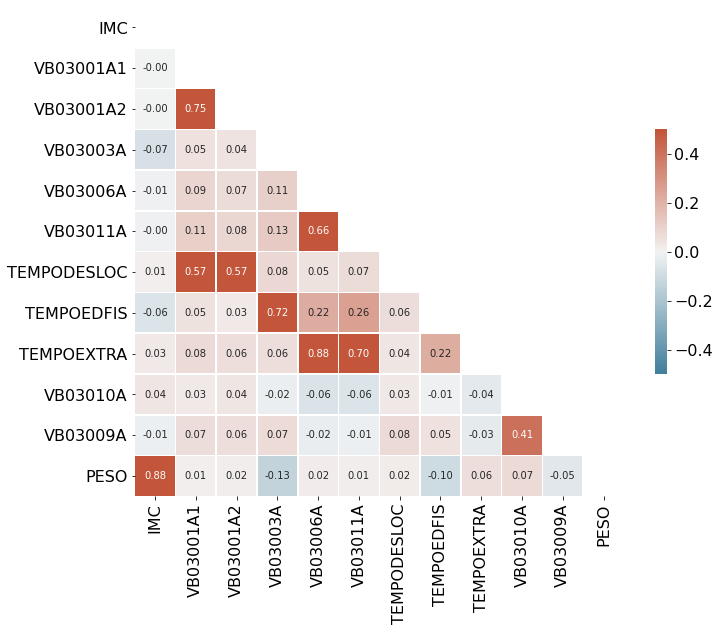

In [ ]:
corr = df_exercicio_quantitativa.rename(columns=alimento_label).corr() # matriz de correlação
mask = np.triu(np.ones_like(corr, dtype=bool))                           # mascara triangular
cmap = sns.diverging_palette(230, 20, as_cmap=True)                      # custom diverging colormap

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, 
            vmin=-.5, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,  fmt='1.2f')

<a name="eCDF"></a>
## Usando a eCDF para observar diferença de comportamento entre as distribuições de IMC
[(voltar para o sumário)](#toc2)

**Resumo**: aqui está a análise principal que leva às conclusões descritas no na seção de "Resumo" do início do caderno.

<a name="breakfast"></a>
### Café da Manhã
[(voltar para o sumário)](#toc2)


**Resumo**: a conclusão foi observada ao observar a eCDF dos dados de IMC e plotando as curvas com agrupamentos (hue) de acordo com as respostas dos hábitos de café da manhã. 

> VB02019A: Você costuma tomar o café da manhã?
> - (1, 'Sim, todos os dias')
> - (2, 'Sim, 5 a 6 dias por semana')
> - (3, 'Sim, 3 a 4 dias por semana')
> - (4, 'Sim, 1 a 2 dias por semana')
> - (5, 'Raramente')
> - (6, 'Não')
> - (99, 'Não informado')

O grupo 99 foi descartado das análises.

Considerando as amostras de IMC de cada uma das possíveis respostas, fiz um teste de normalidade (rejeitado para todas as opções de resposta). Portanto, para comparar as distribuições de IMC em função de cada opção de resposta, utilizei um teste não paramétrico (``ranksums``, por conveniência) para determinar se todas as distribuições eram independentes. Aparentemente, somente as opções 1 e 6 tratam de distribuições independentes, enquanto ao comparar qualquer para das opções 2 até 5, não é possível rejeitar a hipótese de que as amostras partem da mesma distribuição.

Assim, ao agrupar as opções 2 até 5 em uma única categoria, fica mais evidente a diferença da eCDF de cada grupo.

Os dados sugerem que a média de IMC é maior para os estudantes que não tomam café da manhã. Da mesma maneira, a proporção de estudantes acima do peso é mais alta nesses grupos em relação aos estudantes que tomam o café da manhã diariamente.

VB02019A: Você costuma tomar o café da manhã?
(1, 'Sim, todos os dias')
(2, 'Sim, 5 a 6 dias por semana')
(3, 'Sim, 3 a 4 dias por semana')
(4, 'Sim, 1 a 2 dias por semana')
(5, 'Raramente')
(6, 'Não')
(99, 'Não informado')


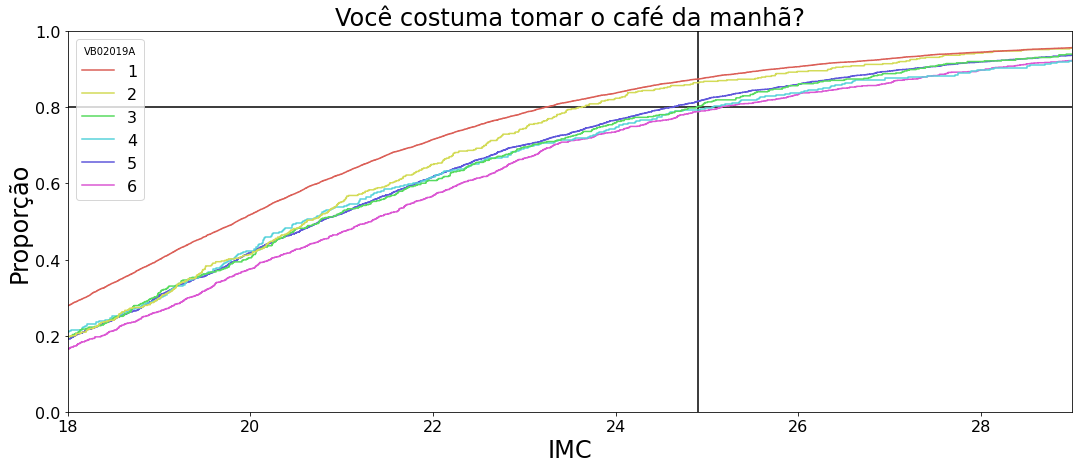

In [ ]:
q = 'VB02019A'
plot_ecdfs_of_imc(q, vline = (24.9, 0, 1), hline = (0.8, 18, 29))
print(*dict_PENSE_ALUNO_2[q][1].items(),sep='\n')

''

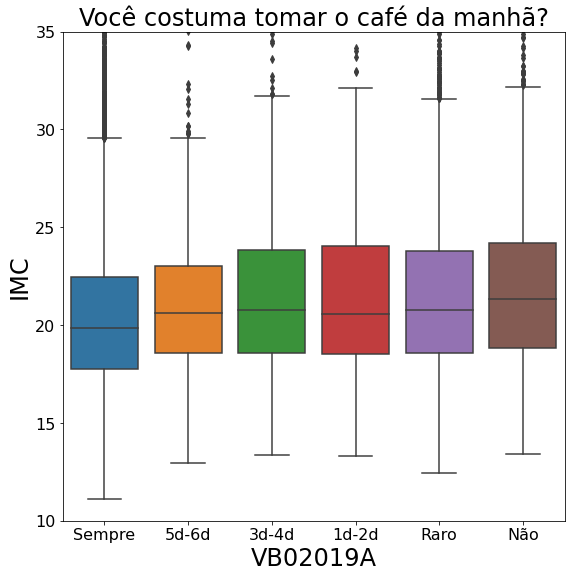

In [ ]:
q = 'VB02019A'
boxplots_q_categorica(q)
ticks, labels = list(zip(*[(0,'Sempre'),
                            (1,'5d-6d'),
                            (2,'3d-4d'),
                            (3,'1d-2d'),
                            (4,'Raro'),
                            (5,'Não')]))
plt.xticks(ticks, labels)
;

In [ ]:
q='VB02019A'
distribuicao_IMC = []
for i in range(0,6):
    distribuicao_IMC.append(df.query(f'{q} == {i+1}')['IMC'])
    s, p = normaltest(distribuicao_IMC[i])
    print(f'opção {i}: p-valor = {p}')

opção 0: p-valor = 0.0
opção 1: p-valor = 1.1566859413471987e-28
opção 2: p-valor = 1.20519802213062e-41
opção 3: p-valor = 3.848504172029124e-26
opção 4: p-valor = 6.460467027133732e-155
opção 5: p-valor = 1.2460711262180977e-112


Ao analisar a distribuição de IMCs a partir das respostas da questão:

> VB02019A: Você costuma tomar o café da manhã?

pode-ser as respostas intermediárias
- *(2, 'Sim, 5 a 6 dias por semana')*
- *texto em itálico*(3, 'Sim, 3 a 4 dias por semana')
- *(4, 'Sim, 1 a 2 dias por semana')*
- *(5, 'Raramente')*
parecem pertencer à mesma distribuição (teste não-paramétrico ``ranksums`` após rejeitar normalidade com ``normaltest``).

Já as distribuições de IMC das respostas 
- (1, 'Sim, todos os dias')
- (6, 'Não')
parecem ser únicas.


In [ ]:
rejected = []
for x1, x2 in product(range(0,6), repeat = 2):
    if x1!=x2:
        s, p = ranksums(distribuicao_IMC[x1], distribuicao_IMC[x2])
        if p >= 0.05:
            print(f'talvez opt {x1+1} e opt {x2+1} pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)')
        if p < 0.05:
            rejected.append(f'opt {x1+1} e opt {x2+1} NÃO pertencem à mesma distribuição (H0: x1==x2 rej. com p=0.05)')
# H0 (as duas medidas são da mesma distribuição)
# p<0.05 rejeita H0

print(*rejected,sep='\n')

talvez opt 2 e opt 3 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 2 e opt 4 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 2 e opt 5 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 3 e opt 2 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 3 e opt 4 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 3 e opt 5 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 4 e opt 2 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 4 e opt 3 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 4 e opt 5 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 5 e opt 2 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 5 e opt 3 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 5 e opt 4 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
opt 1 e opt 2 NÃO pertencem 

[1. 2. 3.]


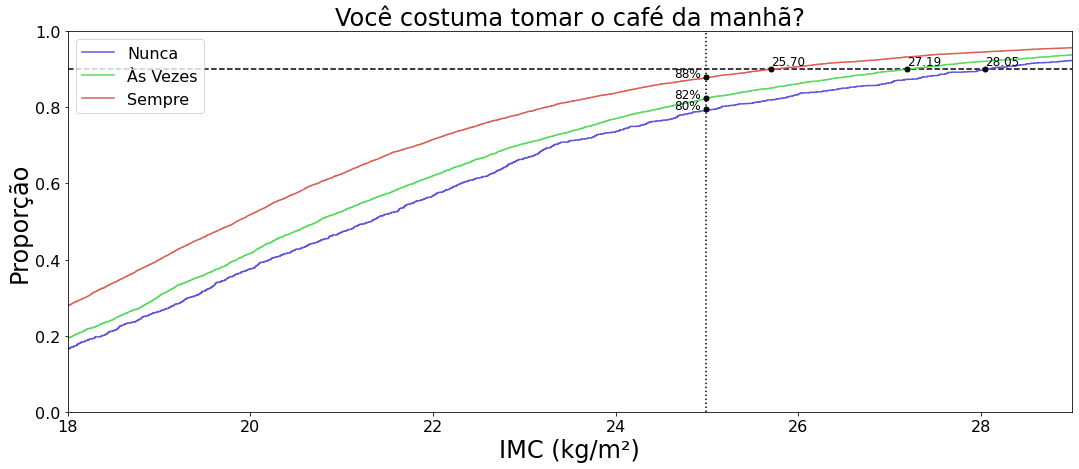

In [ ]:
q = 'VB02019A'

df['cafe'] = df[q].replace({3:2,4:2,5:2,6:3,99:np.nan})
df_cafe_novos_grupos = df.loc[df['cafe'].dropna().index]
print(df_cafe_novos_grupos['cafe'].unique())

perc = .9

hline = (perc, 18, 29)
# vline = (24.99, 0, 1)

plt.figure(figsize=(18,7))
sns.ecdfplot(data=df_cafe_novos_grupos, x='IMC', hue='cafe', 
             palette=sns.color_palette("hls", 3))
plt.title(dict_PENSE_ALUNO_2[q][0])
plt.xlabel('IMC (kg/m²)')
plt.ylabel('Proporção')
plt.hlines(y=hline[0],xmin=hline[1],xmax=hline[2], ls='--')
# plt.vlines(x=vline[0],ymin=vline[1],ymax=vline[2])
plt.xlim([18,29])
plt.legend(['Nunca','Às Vezes','Sempre'])

# Plotando o quantil
for i in [1,2,3]:
  qi = df_cafe_novos_grupos[df_cafe_novos_grupos['cafe']==i]['IMC'].quantile(perc)
  plt.plot(qi, perc, 'ok', ms=5)
  plt.text(x=qi, y=perc+0.01, s=f'{qi:.2f}',fontsize=12)


imc_fix = 24.99
vline = (imc_fix, 0, 1)
plt.vlines(x=vline[0],ymin=vline[1],ymax=vline[2], ls=':')
y_25 = [0.795, 0.825, 0.88]
for i in [1,2,3]:
  plt.plot(imc_fix, y_25[i-1], 'ok', ms=5)
  plt.text(x=imc_fix-.35, y=y_25[i-1], s=f'{100*y_25[i-1]:.0f}%',fontsize=12)

plt.savefig('cafe_da_manha.png', bbox_inches='tight')

<a name="turno"></a>
### Turno que Estuda
[(voltar para o sumário)](#toc2)


**Resumo**: a conclusão foi observada ao observar a eCDF dos dados de IMC e plotando as curvas com agrupamentos (hue) de acordo com as respostas para a seguinte pergunta:

> VB01022: Em que turno você estuda?
> - (1, 'Manhã')
> - (2, 'Intermediário')
> - (3, 'Tarde')
> - (4, 'Noite')
> - (5, 'Integral')
> - (99, 'Não informado')

O grupo 99 foi descartado das análises.

O restante da análise é idêntico ao caso do café da manhã. Aqui, agrupam-se na mesma categoria os IMCs dos estudantes que marcaram estudar nos turnos "Manhã", "Intermediário" e "Integral".

A conclusão é que estudantes do turno da tarde possuem a menor média de IMC, enquanto estudantes do turno da noite possuem a maior média de IMC. Entretanto, ainda não consegui encontrar nos dados outros fatores que explicam esse fenômeno.

VB01022: Em que turno você estuda?
(1, 'Manhã')
(2, 'Intermediário')
(3, 'Tarde')
(4, 'Noite')
(5, 'Integral')
(99, 'Não informado')


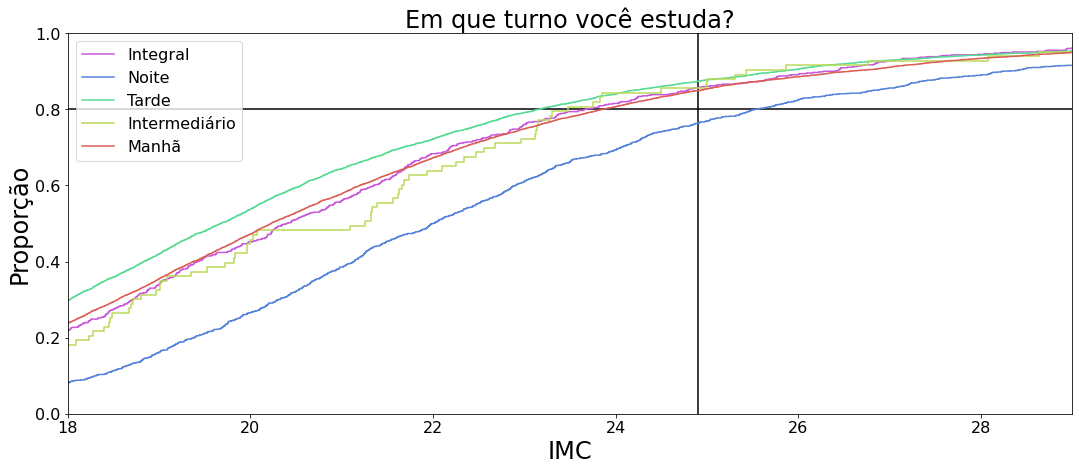

In [ ]:
q = 'VB01022'
plot_ecdfs_of_imc(q, vline = (24.9, 0, 1), hline = (0.8, 18, 29))
print(*dict_PENSE_ALUNO_2[q][1].items(),sep='\n')
plt.legend(list(dict_PENSE_ALUNO_2[q][1].values())[:-1][::-1])

In [ ]:
q='VB01022'
distribuicao_IMC = []
for i in range(0,5):
    distribuicao_IMC.append(df.query(f'{q} == {i+1}')['IMC'])
    s, p = normaltest(distribuicao_IMC[i])
    print(f'opção {dict_PENSE_ALUNO_2[q][1][i+1]}: p-valor = {p}')

opção Manhã: p-valor = 0.0
opção Intermediário: p-valor = 1.5528386166461885e-08
opção Tarde: p-valor = 0.0
opção Noite: p-valor = 1.6391324059244075e-85
opção Integral: p-valor = 1.1016838788651853e-33


In [ ]:
rejected = []
for x1, x2 in product(range(0,5), repeat = 2):
    if x1!=x2:
        s, p = ranksums(distribuicao_IMC[x1], distribuicao_IMC[x2])
        if p >= 0.05:
            print(f'talvez opt {dict_PENSE_ALUNO_2[q][1][x1+1]} e opt {dict_PENSE_ALUNO_2[q][1][x2+1]} pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)')
        if p < 0.05:
            rejected.append(f'opt {dict_PENSE_ALUNO_2[q][1][x1+1]} e opt {dict_PENSE_ALUNO_2[q][1][x2+1]} NÃO pertencem à mesma distribuição (H0: x1==x2 rej. com p=0.05)')
# H0 (as duas medidas são da mesma distribuição)
# p<0.05 rejeita H0

print(*rejected,sep='\n')

# conclusão: 1, 2 e 5 pertencem à mesma distribuição (manhã, intermediário e integral)
# 3 e 4 são duas distribuições independentes (tarde e noite)

talvez opt Manhã e opt Intermediário pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt Manhã e opt Integral pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt Intermediário e opt Manhã pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt Intermediário e opt Integral pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt Integral e opt Manhã pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt Integral e opt Intermediário pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
opt Manhã e opt Tarde NÃO pertencem à mesma distribuição (H0: x1==x2 rej. com p=0.05)
opt Manhã e opt Noite NÃO pertencem à mesma distribuição (H0: x1==x2 rej. com p=0.05)
opt Intermediário e opt Tarde NÃO pertencem à mesma distribuição (H0: x1==x2 rej. com p=0.05)
opt Intermediário e opt Noite NÃO pertencem à mesma distribuição (H0: x1==x2 rej. com p=0.05)
opt Tarde e opt Manhã NÃO pertencem à mesma distribuição (H0: 

[1. 2. 3.]


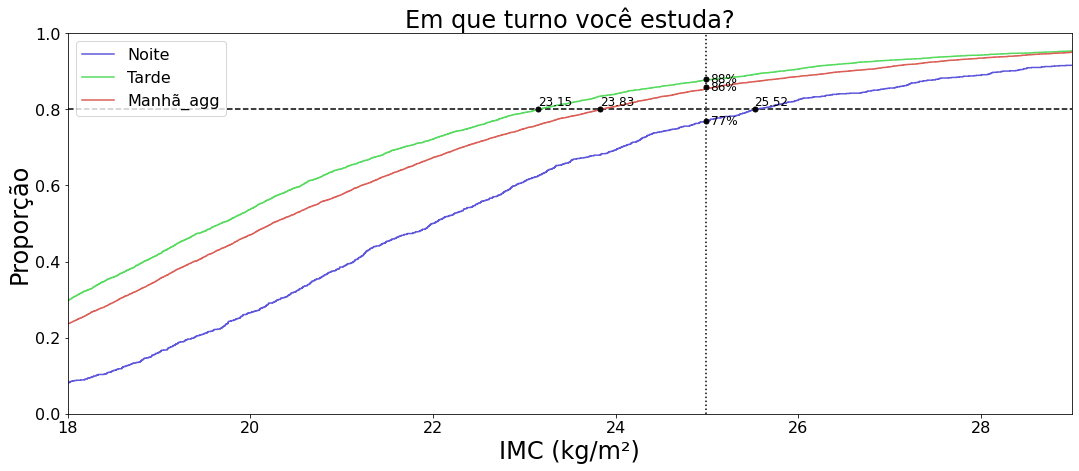

In [ ]:
q = 'VB01022'

df['turno_agg'] = df[q].replace({2:1,5:1,3:2, 4:3, 99:np.nan})
df_turno_novos_grupos = df.loc[df['turno_agg'].dropna().index]
print(df_turno_novos_grupos['turno_agg'].unique())

perc = .8

hline = (perc, 18, 29)

plt.figure(figsize=(18,7))
sns.ecdfplot(data=df_turno_novos_grupos, x='IMC', hue='turno_agg', 
             palette=sns.color_palette("hls", 3))
plt.title(dict_PENSE_ALUNO_2[q][0])
plt.xlabel('IMC (kg/m²)')
plt.ylabel('Proporção')
plt.hlines(y=hline[0],xmin=hline[1],xmax=hline[2], ls='--')
plt.xlim([18,29])
plt.legend(['Noite','Tarde','Manhã_agg'])

# Plotando o quantil
for i in [1,2,3]:
  qi = df_turno_novos_grupos[df_turno_novos_grupos['turno_agg']==i]['IMC'].quantile(perc)
  plt.plot(qi, perc, 'ok', ms=5)
  plt.text(x=qi, y=perc+0.01, s=f'{qi:.2f}',fontsize=12)
plt.savefig('turno_de_estudo.png', bbox_inches='tight')

imc_fix = 24.99
vline = (imc_fix, 0, 1)
plt.vlines(x=vline[0],ymin=vline[1],ymax=vline[2], ls=':')
y_25 = [0.77, 0.86, 0.88]
for i in [1,2,3]:
  plt.plot(imc_fix, y_25[i-1], 'ok', ms=5)
  plt.text(x=imc_fix+.05, y=y_25[i-1]-0.01, s=f'{100*y_25[i-1]:.0f}%',fontsize=12)
plt.savefig('turno_de_estudo.png', bbox_inches='tight')


<a name="parents_meals"></a>
### Refeições junto com os pais
[(voltar para o sumário)](#toc2)


**Resumo**: a conclusão foi observada ao observar a eCDF dos dados de IMC e plotando as curvas com agrupamentos (hue) de acordo com as respostas da seguinte pergunta:

> VB02017A: Você costuma almoçar ou jantar com sua mãe, pai ou responsável? 
> - (1, 'Sim, todos os dias')
> - (2, 'Sim, 5 a 6 dias por semana')
> - (3, 'Sim, 3 a 4 dias por semana')
> - (4, 'Sim, 1 a 2 dias por semana')
> - (5, 'Raramente')
> - (6, 'Não')
> - (99, 'Não informado')

O grupo 99 foi descartado das análises.

O restante da análise é idêntico ao caso do café da manhã. 

Aqui, a única categoria que se distingue das demais é a dos estudantes que afirma almoçar ou jantar todos os dias com seus pais. Esse grupo possui uma média de IMC levemente menor que a média dos demais. A fatia de estudantes acima do peso é maior no agrupamento dos estudantes que não tem esse hábito.

VB02017A: Você costuma almoçar ou jantar com sua mãe, pai ou responsável? 
(1, 'Sim, todos os dias')
(2, 'Sim, 5 a 6 dias por semana')
(3, 'Sim, 3 a 4 dias por semana')
(4, 'Sim, 1 a 2 dias por semana')
(5, 'Raramente')
(6, 'Não')
(99, 'Não informado')


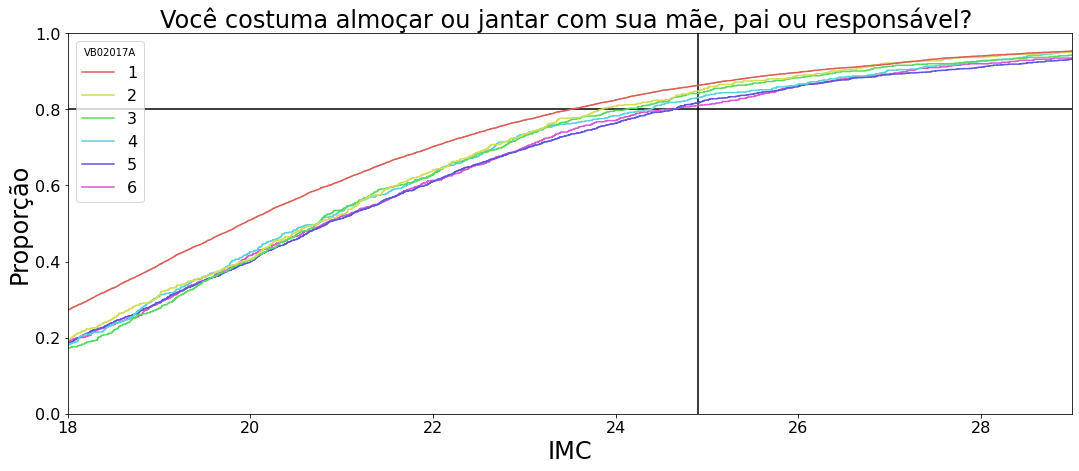

In [ ]:
q = 'VB02017A'
plot_ecdfs_of_imc(q, vline = (24.9, 0, 1), hline = (0.8, 18, 29))
print(*dict_PENSE_ALUNO_2[q][1].items(),sep='\n')

In [ ]:
q='VB02017A'
distribuicao_IMC = []
for i in range(0,6):
    distribuicao_IMC.append(df.query(f'{q} == {i+1}')['IMC'])
    s, p = normaltest(distribuicao_IMC[i])
    print(f'opção {i}: p-valor = {p}')

opção 0: p-valor = 0.0
opção 1: p-valor = 7.359538299143052e-52
opção 2: p-valor = 4.268292731603275e-39
opção 3: p-valor = 1.2816237857705124e-28
opção 4: p-valor = 1.5050446475423466e-138
opção 5: p-valor = 7.232042901773103e-49


In [ ]:
rejected = []
for x1, x2 in product(range(0,6), repeat = 2):
    if x1!=x2:
        s, p = ranksums(distribuicao_IMC[x1], distribuicao_IMC[x2])
        if p >= 0.05:
            print(f'talvez opt {x1+1} e opt {x2+1} pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)')
        if p < 0.05:
            rejected.append(f'opt {x1+1} e opt {x2+1} NÃO pertencem à mesma distribuição (H0: x1==x2 rej. com p=0.05)')
# H0 (as duas medidas são da mesma distribuição)
# p<0.05 rejeita H0

print(*rejected,sep='\n')

# conclusão: {1} e {2,3,4,5,6}

talvez opt 2 e opt 3 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 2 e opt 4 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 2 e opt 5 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 2 e opt 6 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 3 e opt 2 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 3 e opt 4 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 3 e opt 5 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 3 e opt 6 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 4 e opt 2 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 4 e opt 3 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 4 e opt 5 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 4 e opt 6 pertençam à mesma distribuição (H0: x1==x2 rej. com p=0.05)
talvez opt 5 e opt 2 pertenç

[1. 2.]


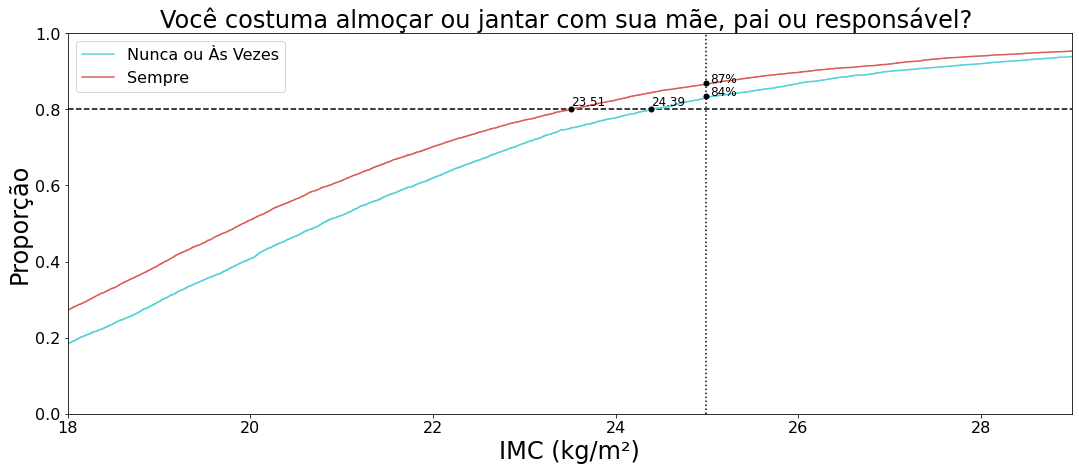

In [ ]:
q = 'VB02017A'

df['meals_w_parents_agg'] = df[q].replace({3:2, 4:2, 5:2, 6:2, 99:np.nan})
df_refeicoes_pais = df.loc[df['meals_w_parents_agg'].dropna().index]
print(df_refeicoes_pais['meals_w_parents_agg'].unique())

perc = .8

hline = (perc, 18, 29)
# vline = (24.99, 0, 1)

plt.figure(figsize=(18,7))
sns.ecdfplot(data=df_refeicoes_pais, x='IMC', hue='meals_w_parents_agg', 
             palette=sns.color_palette("hls", 2))
plt.title(dict_PENSE_ALUNO_2[q][0])
plt.xlabel('IMC (kg/m²)')
plt.ylabel('Proporção')
plt.hlines(y=hline[0],xmin=hline[1],xmax=hline[2], ls='--')
# plt.vlines(x=vline[0],ymin=vline[1],ymax=vline[2])
plt.xlim([18,29])
plt.legend(['Nunca ou Às Vezes','Sempre'])

# Plotando o quantil
for i in [1,2]:
  qi = df_refeicoes_pais[df_refeicoes_pais['meals_w_parents_agg']==i]['IMC'].quantile(perc)
  plt.plot(qi, perc, 'ok', ms=5)
  plt.text(x=qi, y=perc+0.01, s=f'{qi:.2f}',fontsize=12)

imc_fix = 24.99
vline = (imc_fix, 0, 1)
plt.vlines(x=vline[0],ymin=vline[1],ymax=vline[2], ls=':')
y_25 = [0.835, 0.87]
for i in [1,2]:
  plt.plot(imc_fix, y_25[i-1], 'ok', ms=5)
  plt.text(x=imc_fix+.05, y=y_25[i-1], s=f'{100*y_25[i-1]:.0f}%',fontsize=12)
plt.savefig('refeicao_pais.png', bbox_inches='tight')